In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys

# Data Description

- read_name - "The original read name"
- read_length - "The length of the read in bases"
- read_idx - "Unique integer ID of the read"
- contact_is_direct - "There are no intervening assigned restriction fragments on the read"
- contact_is_cis - "Both alignments come from the same chromsome/contig"
- contact_read_distance - "The distance between the end of the left alignment and the start of the right alignment on the read"
- contact_genome_distance - "The distance between the end of the left alignment and the start of the right alignment (valid for cis contacts only)"
- contact_fragment_adjacent - "A boolean to indicate if the contact is between the same or adjacent fragments"
- contact_fragment_distance - "The distance between the midpoints of the assigned fragments (valid for cis contacts only)"
- haplotype_pair_type - "A categorical variable describing the relationship between the haplotypes assigned to each of the alignments in a contact"
- align1_align_idx - "Unique integer ID of the first aligned segment"
- align1_chrom - "The chromosome/contig of the first aligned segment"
- align1_start - "The zero-based start position on the genome of the alignment"
- align1_end - "The end position on the genome of the alignment"
- align1_strand - "The alignment strand"
- align1_mapping_quality - "The mapping quality as calculated by the aligner"
- align1_align_score - "The alignment score as calculated by the aligner"
- align1_align_base_qscore - "The mean read base score for the aligned segment (rounded to the nearest integer)."
- align1_phase_set - "The ID of the phase set, often this is the start position of the phase block"
- align1_phase_qual - "The phred-scaled quality score of the haplotype assignment"
- align1_haplotype - "The id of the haplotype within this block, usually set to 1 or 2. A value of -1 means that this alignment is unphased"
- align1_fragment_id - "The UID of the restriction fragment assigned to this alignment"
- align1_fragment_start - "The start point on the genome of this restriction fragment"
- align1_fragment_end - "The end point on the genome of this restriction fragment"
- align2_align_idx - "Unique integer ID of the first aligned segment"
- align2_chrom - "The chromosome/contig of the first aligned segment"
- align2_start - "The zero-based start position on the genome of the alignment"
- align2_end - "The end position on the genome of the alignment"
- align2_strand - "The alignment strand"
- align2_mapping_quality - The mapping quality as calculated by the aligner"
- align2_align_score - "The alignment score as calculated by the aligner",
- align2_align_base_qscore= - "The mean read base score for the aligned segment (rounded to the nearest integer)."
- align2_phase_set - "The ID of the phase set, often this is the start position of the phase block"
- align2_phase_qual - "The phred-scaled quality score of the haplotype assignment"
- align2_haplotype - "The id of the haplotype within this block, usually set to 1 or 2. A value of -1 means that this alignment is unphased"
- align2_fragment_id - "The UID of the restriction fragment assigned to this alignment"
- align2_fragment_start - "The start point on the genome of this restriction fragment"
- align2_fragment_end - "The end point on the genome of this restriction fragment"


# Loading Data

In [2]:
# dirpath = "/nfs/turbo/umms-indikar/shared/tools/Pore-C-Snakemake/results_ES_Cells_2021/contacts/"
dirpath = "/nfs/turbo/umms-indikar/shared/tools/Pore-C-Snakemake/results_ES5to12/contacts/"

cell = "NlaIII_run07"

df_list = []
for f in os.listdir(dirpath):
    if cell in f:
        filepath = f"{dirpath}{f}"
        tmp = pd.read_parquet(filepath)
        tmp['batch_id'] = f.split("_")[2]
        
        df_list.append(tmp)
        
        
df = pd.concat(df_list)
print(f"{df.shape=}")
totalRecords = df.shape[0]
print(f"{totalRecords=}")
df.head()

df.shape=(10525887, 38)
totalRecords=10525887


,read_name,read_length,read_idx,contact_is_direct,contact_is_cis,contact_read_distance,contact_genome_distance,contact_fragment_adjacent,contact_fragment_distance,haplotype_pair_type,...,align2_strand,align2_mapping_quality,align2_align_score,align2_align_base_qscore,align2_phase_set,align2_haplotype,align2_fragment_id,align2_fragment_start,align2_fragment_end,batch_id
0,000188c4-51f3-4a10-9bce-f328c3594118,849,22724,True,True,13,-2205,True,0,unphased,...,True,38,216,14,0,-1,7450888,34492235,34499305,batch15
1,000188c4-51f3-4a10-9bce-f328c3594118,849,22724,False,True,199,18,True,0,unphased,...,True,121,166,13,0,-1,7450888,34492235,34499305,batch15
2,000188c4-51f3-4a10-9bce-f328c3594118,849,22724,False,True,432,-856,True,0,unphased,...,True,14,86,22,0,-1,7450888,34492235,34499305,batch15
3,000188c4-51f3-4a10-9bce-f328c3594118,849,22724,True,True,-58,1978,True,0,unphased,...,True,121,166,13,0,-1,7450888,34492235,34499305,batch15
4,000188c4-51f3-4a10-9bce-f328c3594118,849,22724,False,True,175,1104,True,0,unphased,...,True,14,86,22,0,-1,7450888,34492235,34499305,batch15


In [3]:
intraChromosomalContacts = np.where(df['align1_chrom'] == df['align2_chrom'], 1, 0)
print(f"{len(intraChromosomalContacts)=}")
print(f"{np.sum(intraChromosomalContacts)=}")
print(f"{np.sum(intraChromosomalContacts)/len(intraChromosomalContacts)=:.4f}")

len(intraChromosomalContacts)=10525887
np.sum(intraChromosomalContacts)=7456892
np.sum(intraChromosomalContacts)/len(intraChromosomalContacts)=0.7084


In [4]:
# print unfiltered cis/trans ratio
def printCisTransRatio(df):
    cisContacts = np.sum(np.where(df['contact_is_cis'] == 1, 1, 0))
    transContacts = np.sum(np.where(df['contact_is_cis'] == 0, 1, 0))

    
    print(f"{cisContacts=}")
    print(f"{transContacts=}")
    print(f"{cisContacts/transContacts=:.4f}")
    
printCisTransRatio(df)

cisContacts=7456892
transContacts=3068995
cisContacts/transContacts=2.4298


In [5]:
# # Nanago et. state that .99 of reads mapped to cut sites exactly

# align1CutSiteMatch = np.where(df['align1_end'] == df['align1_fragment_end'], 1, 0)
# align2CutSiteMatch = np.where(df['align2_end'] == df['align2_fragment_end'], 1, 0)

# cutSiteMatches = list(align1CutSiteMatch) + list(align2CutSiteMatch)

# exact = np.sum(cutSiteMatches)
# n = len(cutSiteMatches)

# print(f"{exact=}")
# print(f"{n=}")
# print(f"{exact/n=:.3f}")

Text(0, 0.5, 'Number of Contacts')

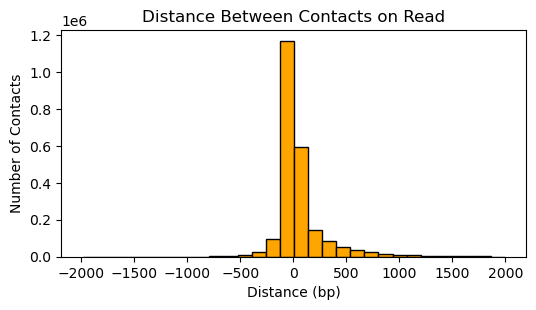

In [6]:
# look at distribution of distances between fragments on read

plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = 6, 3


tmp = df[df['contact_is_direct'] == True]

lb = -2000
ub = 2000

tmp = tmp[(tmp['contact_read_distance'] >= lb) & (tmp['contact_read_distance'] <= ub) ]

plt.hist(tmp['contact_read_distance'], edgecolor='k', bins=30, color='orange')


plt.title('Distance Between Contacts on Read')
plt.xlabel('Distance (bp)')
plt.ylabel('Number of Contacts')

In [7]:
"""
NOTE: there is no sort order between align1 and align2 and fragments can be in either column
"""

# g = []

# for frag in df['align1_fragment_id']:
#     if frag in df['align2_fragment_id']:
#         g.append(1)
#     else:
#         g.append(0)
        
# np.sum(g) / len(g)

'\nNOTE: there is no sort order between align1 and align2 and fragments can be in either column\n'

# Filters

In [8]:
# remove read-level self-loops

def selfLoopFilter(df):
    mask = (df['align1_fragment_id'] == df['align2_fragment_id']) 
    df = df[~mask].reset_index(drop=True)
    return df

print(f"{df.shape=}")
df = selfLoopFilter(df)
currentRecords = df.shape[0]
print(f"{df.shape=}")
print(f"{currentRecords/totalRecords=:.4f}")

df.shape=(10525887, 38)
df.shape=(7718429, 38)
currentRecords/totalRecords=0.7333


In [9]:
# mapping quality filter

def mapQFilter(df, mapQ=30):
    mask = (df['align1_mapping_quality'] >= mapQ) & (df['align2_mapping_quality'] >= mapQ)
    df = df[mask].reset_index(drop=True)
    return df
    
    
print(f"{df.shape=}")
df = mapQFilter(df)
currentRecords = df.shape[0]
print(f"{df.shape=}")
print(f"{currentRecords/totalRecords=:.4f}")

df.shape=(7718429, 38)
df.shape=(3386755, 38)
currentRecords/totalRecords=0.3218


In [10]:
# a filter for direct contacts too far away on the read

def distalContactFilter(df, read_distance=1000):
    mask = (df['contact_is_direct'] == True)
    
    directContact = df[mask].reset_index(drop=True)
    expandedContact = df[~mask].reset_index(drop=True)
    
    mask = (np.abs(directContact['contact_read_distance']) <= read_distance) 
    directContact = directContact[mask].reset_index(drop=True)
    
    df = pd.concat([directContact, expandedContact])
    
    return df

print(f"{df.shape=}")
df = distalContactFilter(df)
currentRecords = df.shape[0]
print(f"{df.shape=}")
print(f"{currentRecords/totalRecords=:.4f}")

df.shape=(3386755, 38)
df.shape=(3373318, 38)
currentRecords/totalRecords=0.3205


In [11]:
# cis contacts within 1kb ON THE REFERENCE are assumed to be amplification bias

def closeContactFilter(df, genome_distance=1000):
    """cis contacts only """
    
    cisContacts = df[df['contact_is_cis'] == True]
    transContacts = df[df['contact_is_cis'] == False]
    
    mask = (np.abs(cisContacts['contact_genome_distance']) >= genome_distance)
    cisContacts = cisContacts[mask].reset_index(drop=True)

    df = pd.concat([cisContacts, transContacts], ignore_index=True)
    return df


print(f"{df.shape=}")
df = closeContactFilter(df)
currentRecords = df.shape[0]
print(f"{df.shape=}")
print(f"{currentRecords/totalRecords=:.4f}")

df.shape=(3373318, 38)
df.shape=(2493274, 38)
currentRecords/totalRecords=0.2369


In [12]:
# filter duplicate contacts: does this make sense? the contact with the higest average MAPQ is retained

def duplicateContactFilter(df, retain=1):
    # retain == 1 is unique contacts

    df['mean_mapping_quality'] = (df['align1_mapping_quality'] + df['align2_mapping_quality']) / 2
    
    df = df.sort_values(by=['align1_fragment_id', 
                            'align2_fragment_id', 
                            'mean_mapping_quality'], ascending=False)
    
    df['contact_count'] = df.groupby(["align1_fragment_id", "align2_fragment_id"])["read_name"].transform("cumcount")
    df['contact_count'] = df['contact_count'] + 1

    mask = (df['contact_count'] <= retain)
    df = df[mask].reset_index(drop=True)
    return df
    

print(f"{df.shape=}")
df = duplicateContactFilter(df, retain=1)
currentRecords = df.shape[0]
print(f"{df.shape=}")
print(f"{currentRecords/totalRecords=:.4f}")

df.shape=(2493274, 38)
df.shape=(635450, 40)
currentRecords/totalRecords=0.0604


In [13]:
# for single cells, there can be at most 2 copies of any sequence (ligation product)

def getFragmentCounts(df):
    allFragments = df['align1_fragment_id'].tolist() + df['align2_fragment_id'].tolist()
    return Counter(allFragments)
    

def ligationProductFilter(df, nProducts=2, verbose=True):
    
    # get fragment counts
    countTranslation = dict(getFragmentCounts(df))

    df['align1_fragcount'] = df['align1_fragment_id'].map(countTranslation)
    df['align2_fragcount'] = df['align2_fragment_id'].map(countTranslation)

    mask = (df['align1_fragcount'] <= nProducts) & (df['align2_fragcount'] <= nProducts)

    # divide into contacts with less than n replicates and more than n replicates
    lowFrequencyProducts = df[mask].reset_index(drop=True)
    amplificationBiasProducts = df[~mask].reset_index(drop=True)
    
    # count the number of unique reads per fragment
    readsPerFragment1 = amplificationBiasProducts[['read_name', 'align1_fragment_id']]
    readsPerFragment2 = amplificationBiasProducts[['read_name', 'align2_fragment_id']]
    
    readsPerFragment1.columns = ['read_name', 'fragment_id']
    readsPerFragment2.columns = ['read_name', 'fragment_id']

    readsPerFragment = pd.concat([readsPerFragment1, readsPerFragment2], ignore_index=True)
    
    if verbose:
        print(f"{lowFrequencyProducts.shape=} ({len(lowFrequencyProducts)/len(df):.3f})")
        print(f"{amplificationBiasProducts.shape=} ({len(amplificationBiasProducts)/len(df):.3f})")

        print(f"{readsPerFragment1.shape=}")
        print(f"{readsPerFragment2.shape=}")
        print(f"{readsPerFragment.shape=}")
    
    readsPerFragment['n_reads'] = readsPerFragment.groupby('fragment_id')["read_name"].transform('nunique')
    readsPerFragmentMappable = pd.Series(readsPerFragment['n_reads'].values, index=readsPerFragment['fragment_id']).to_dict()
    
    # map the number of reads an individual fragment appears in
    amplificationBiasProducts['align1_n_reads'] = amplificationBiasProducts['align1_fragment_id'].map(readsPerFragmentMappable)
    amplificationBiasProducts['align2_n_reads'] = amplificationBiasProducts['align2_fragment_id'].map(readsPerFragmentMappable)
    
    # throw away all contacts which appear in more than n reads 
    mask = (amplificationBiasProducts['align1_n_reads'] <= nProducts) & (amplificationBiasProducts['align2_n_reads'] <= nProducts)
    
    toKeep = amplificationBiasProducts[mask].reset_index(drop=True)
    trash = amplificationBiasProducts[~mask].reset_index(drop=True)
    
    """
    @TODO: need to sort through the trash and resolve 
    """
    
    if verbose:
            print(f"{toKeep.shape=}")
            print(f"{trash.shape=}")
    
    df = pd.concat([lowFrequencyProducts, toKeep])
    
    return df
    

    
print(f"{df.shape=}")
df = ligationProductFilter(df, nProducts=4)
currentRecords = df.shape[0]
print(f"{df.shape=}")
print(f"{currentRecords/totalRecords=:.4f}")

testCounts = getFragmentCounts(df)
print(f"{testCounts.most_common(1)=}")


df.shape=(635450, 40)
lowFrequencyProducts.shape=(40568, 42) (0.064)
amplificationBiasProducts.shape=(594882, 42) (0.936)
readsPerFragment1.shape=(594882, 2)
readsPerFragment2.shape=(594882, 2)
readsPerFragment.shape=(1189764, 2)
toKeep.shape=(71400, 44)
trash.shape=(523482, 44)
df.shape=(111968, 44)
currentRecords/totalRecords=0.0106
testCounts.most_common(1)=[(5691143, 16)]


In [14]:
# break

# Added Features

Text(0, 0.5, 'Number of Reads')

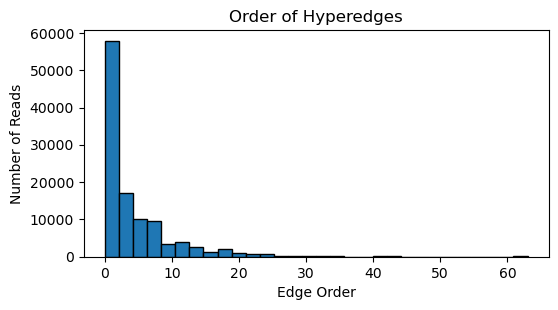

In [15]:
# add the cardinality of the hyperedge
df['edgeOrder'] = df.groupby(["read_name"])["align2_fragment_id"].transform("count")
df['edgeOrder'] = df['edgeOrder'] - 1

res = plt.hist(df['edgeOrder'], edgecolor='k', bins=30)
plt.title('Order of Hyperedges')
plt.xlabel('Edge Order')
plt.ylabel('Number of Reads')

# Mapping to the Assembly

In [16]:
assembly = pd.read_csv("GRCm39_Assembly.txt")
assembly['chromEnd'] = assembly['Total length'].cumsum()
assembly['chromStart'] = assembly['chromEnd'] - assembly['Total length']
assembly['RefSeq accession'] = assembly['RefSeq accession'].str.strip()
assembly

,Chromosome,Total length,GenBank accession,RefSeq accession,chromEnd,chromStart
0,1,195154279,CM000994.3,NC_000067.7,195154279,0
1,2,181755017,CM000995.3,NC_000068.8,376909296,195154279
2,3,159745316,CM000996.3,NC_000069.7,536654612,376909296
3,4,156860686,CM000997.3,NC_000070.7,693515298,536654612
4,5,151758149,CM000998.3,NC_000071.7,845273447,693515298
5,6,149588044,CM000999.3,NC_000072.7,994861491,845273447
6,7,144995196,CM001000.3,NC_000073.7,1139856687,994861491
7,8,130127694,CM001001.3,NC_000074.7,1269984381,1139856687
8,9,124359700,CM001002.3,NC_000075.7,1394344081,1269984381
9,10,130530862,CM001003.3,NC_000076.7,1524874943,1394344081


In [17]:
# filter out non-chromosomal sections of the genome

def chromosomalFilter(df, assembly):
    allChromosomes = assembly['RefSeq accession'].str.strip().to_list()
    
    mask = (df['align1_chrom'].isin(allChromosomes)) & (df['align2_chrom'].isin(allChromosomes))
    df = df[mask].reset_index()
    return df
    

print(f"{df.shape=}")
df = chromosomalFilter(df, assembly)
currentRecords = df.shape[0]
print(f"{df.shape=}")
print(f"{currentRecords/totalRecords=:.4f}")

df.shape=(111968, 45)
df.shape=(111839, 46)
currentRecords/totalRecords=0.0106


In [18]:
# add the chromosome starting location to each fragment

chromosomeStart = pd.Series(assembly['chromStart'].values, index=assembly['RefSeq accession'].str.strip()).to_dict()

df['align1_chrom_start'] = df['align1_chrom'].astype(str).map(chromosomeStart)
df['align2_chrom_start'] = df['align2_chrom'].astype(str).map(chromosomeStart)

# create genomewide starting position of fragments
df['align1_absolute_position'] = df['align1_fragment_start'] + df['align1_chrom_start']
df['align2_absolute_position'] = df['align2_fragment_start'] + df['align2_chrom_start']

print('done.')

done.


In [19]:
# break

In [20]:
intraChromosomalContacts = np.where(df['align1_chrom'] == df['align2_chrom'], 1, 0)
print(f"{len(intraChromosomalContacts)=}")
print(f"{np.sum(intraChromosomalContacts)=}")
print(f"{np.sum(intraChromosomalContacts)/len(intraChromosomalContacts)=:.4f}")

len(intraChromosomalContacts)=111839
np.sum(intraChromosomalContacts)=79227
np.sum(intraChromosomalContacts)/len(intraChromosomalContacts)=0.7084


# Binning 

In [21]:
# adding genome-wide binning

def getBins(length, scale):
    """ Return bin IDS for a given range of bp """
    n = int(np.ceil(length / scale))    
    bins = [scale]
    for i in range(n-1):
        next_bin = bins[i] + scale
        bins.append(next_bin)
    return np.array(bins)


def returnBin(position, bins):
    idx = np.min(np.argwhere(bins > position))
    return idx - 1 


def wholeGenomeBinData(df, bins, label):
    df[f'align1_{label}Bin'] = df['align1_absolute_position'].apply(lambda x: returnBin(x, bins))
    df[f'align2_{label}Bin'] = df['align2_absolute_position'].apply(lambda x: returnBin(x, bins))
    return df


def genomeWideBins(df, assembly, scale=1000000):
    totalLength = assembly['chromEnd'].max()
    bins = getBins(totalLength, scale)
    
    df = wholeGenomeBinData(df, bins, label='genome')
    return df, bins
    
    
    
df, genomeBins = genomeWideBins(df, assembly)
print('genome-wide binning done.')

genome-wide binning done.


In [22]:
# get the binned chromosome positions
chromBins = {}

for idx, row in assembly.iterrows():
    chromBin = returnBin(row['chromEnd'], genomeBins)
    chromBins[row['Chromosome']] = chromBin
    

print('done.')                      

done.


[Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '18'),
 Text(0, 0, '19'),
 Text(0, 0, 'X'),
 Text(0, 0, 'Y')]

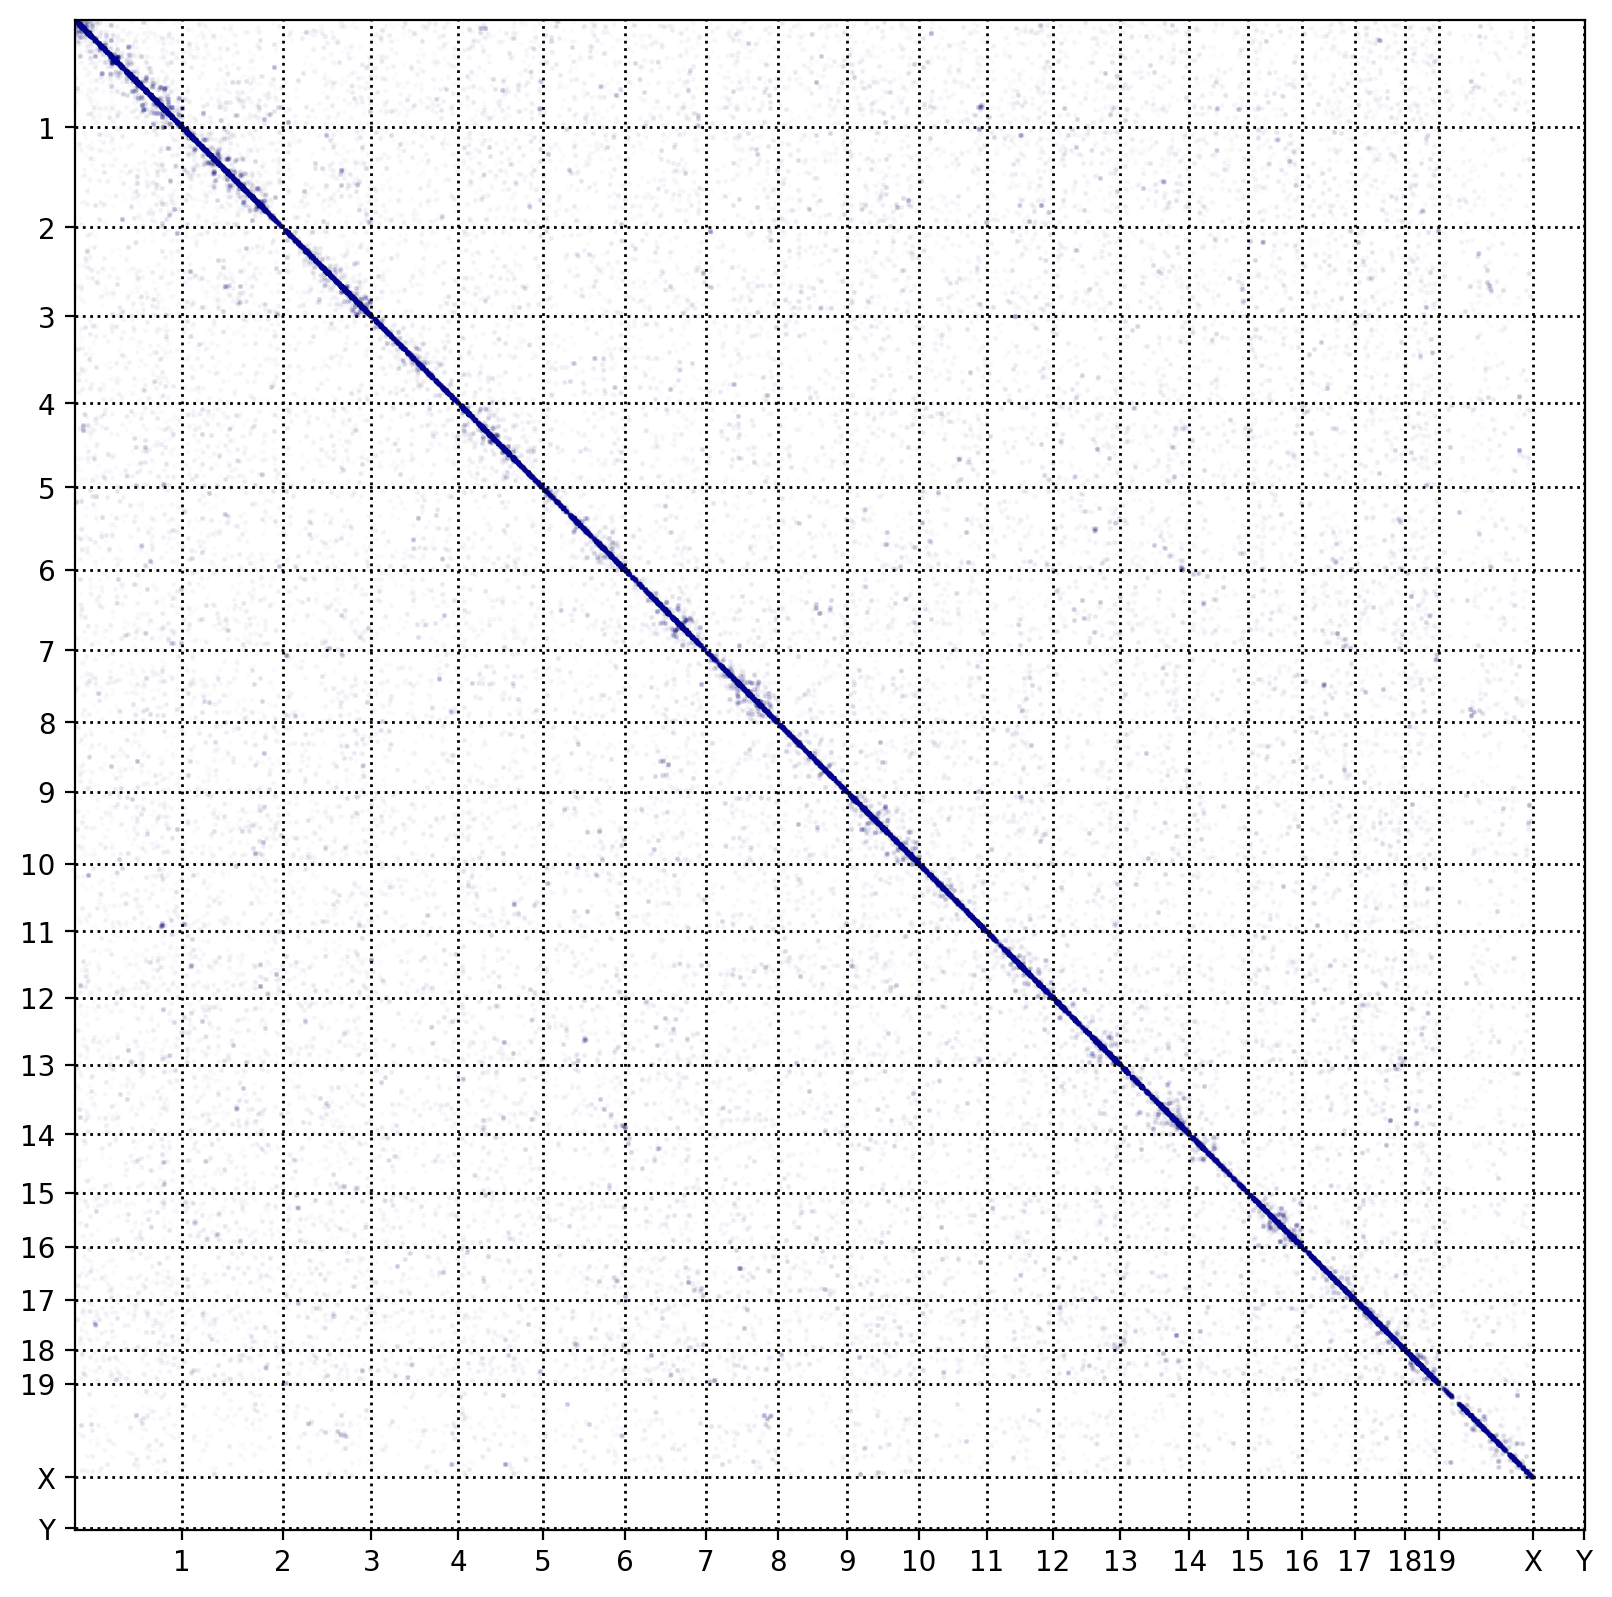

In [23]:
# plot the genome-wide conformation
alpha = 0.01
size = 0.5

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 10, 10

plt.scatter(df['align1_genomeBin'], 
            df['align2_genomeBin'], 
            marker='s', 
            s=size, 
            alpha=alpha, 
            c='darkblue')

plt.scatter(df['align2_genomeBin'], 
            df['align1_genomeBin'], 
            marker='s', 
            s=size, 
            alpha=alpha, 
            c='darkblue')


plt.xlim(0, len(genomeBins))
plt.ylim(len(genomeBins), 0)
ax = plt.gca() # Get current axes object
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.gca().set_aspect('equal', adjustable='box')

for k, v in chromBins.items():
    plt.axvline(x=v, lw=1, c='k', ls=':')
    plt.axhline(y=v, lw=1, c='k', ls=':')

plt.xticks(list(chromBins.values()))
ax.set_xticklabels(list(chromBins.keys()))

plt.yticks(list(chromBins.values()))
ax.set_yticklabels(list(chromBins.keys()))

# Chromosome Selection

In [29]:
# subset the data to a single chromosome
chomosome = 2
chrom_assembly = assembly.loc[assembly['Chromosome'] == str(chomosome)]
refseq = chrom_assembly['RefSeq accession'].tolist()[0].strip()
chromLength = chrom_assembly['Total length'].tolist()[0]

def filterChomosome(df, refseq):
    mask = (df['align1_chrom'] == refseq) & (df['align2_chrom'] == refseq)
    df = df[mask].reset_index(drop=True)
    return df
    
    
chr2 = filterChomosome(df, refseq)
print(f"{chr2.shape=}")

chr2.shape=(6679, 52)


In [32]:
# bin data within a chromosome
# scale = 100000 #100kb scale
scale = 1000000 # 1mb scale


def chromosomeBinData(df, bins, label):
    df[f'align1_{label}Bin'] = df['align1_fragment_start'].apply(lambda x: returnBin(x, bins))
    df[f'align2_{label}Bin'] = df['align2_fragment_start'].apply(lambda x: returnBin(x, bins))
    return df


bins = getBins(chromLength, scale)
print(f"{len(bins)=}")


chr21mb = chromosomeBinData(chr2, bins, label='chrom2')
print('done.')

len(bins)=182
done.


# Construct pseudo Hi-C Matrices

In [35]:
def constructHiCSingleChromosome(df, bins, binary=False):
    A = np.zeros((len(bins), len(bins)))
    
    for ind, row in df.iterrows():
        i = row['align1_chrom2Bin']
        j = row['align2_chrom2Bin']
        A[i, j] = A[i, j] + 1
        A[j, i] = A[j, i] + 1
        
    if binary:
        A = np.where(A > 0, 1, 0)
    return A

A = constructHiCSingleChromosome(chr2, bins, binary=False)
print(f"{A.shape=}")

np.argsort(np.sum(A, axis=0))
    

A.shape=(182, 182)


array([  0, 175, 180, 181,   1, 174, 179, 162, 176,  25, 167, 170, 156,
       164, 178,  91, 171, 154, 152,  68,  58, 158, 159, 168, 155, 161,
        84, 122, 115, 129,  31,  26,  30, 157, 105,  66, 169,  89,  71,
        69,  44, 110, 119,  92,  85, 118,  65, 101, 172,  94,  77, 153,
       106,  43,  34, 165,  45,  52,  70,  60, 151, 100, 117, 135, 177,
        32, 146,  13, 166,  53, 141, 160,  63,  42, 116,  23,  98,  18,
       132,  97, 113, 173,  74, 136, 144,   9,  61,   6,  39, 102,  99,
        54,  49,  27,  15,  29,  95,  48, 145,   4,  62, 133,  57,  14,
       123, 147,  51,  90, 120,   8,  37, 149,  96,  38,   3, 143,  17,
        12, 150,  73,  10,  24,  36,  78,  20,  21,  41,  47,  40, 126,
       112,  28,  33,  11, 131,  83,  93,  50, 107,  72, 163,   2, 140,
       134,   7, 124,  46, 121, 108, 114,  35,  88,  87,  16,  76, 142,
       128, 103, 111, 109,  75,  86,  22,  67, 130,   5, 127, 148,  59,
       138,  82,  80,  19, 125, 104, 139, 137,  56,  79,  81,  6

In [39]:
chr2.columns

Index(['index', 'read_name', 'read_length', 'read_idx', 'contact_is_direct',
       'contact_is_cis', 'contact_read_distance', 'contact_genome_distance',
       'contact_fragment_adjacent', 'contact_fragment_distance',
       'haplotype_pair_type', 'align1_align_idx', 'align1_chrom',
       'align1_start', 'align1_end', 'align1_strand', 'align1_mapping_quality',
       'align1_align_score', 'align1_align_base_qscore', 'align1_phase_set',
       'align1_phase_qual', 'align1_haplotype', 'align1_fragment_id',
       'align1_fragment_start', 'align1_fragment_end', 'align2_align_idx',
       'align2_chrom', 'align2_start', 'align2_end', 'align2_strand',
       'align2_mapping_quality', 'align2_align_score',
       'align2_align_base_qscore', 'align2_phase_set', 'align2_haplotype',
       'align2_fragment_id', 'align2_fragment_start', 'align2_fragment_end',
       'batch_id', 'mean_mapping_quality', 'contact_count', 'align1_fragcount',
       'align2_fragcount', 'align1_n_reads', 'align2_n_r

# Single Chromosome Plotting

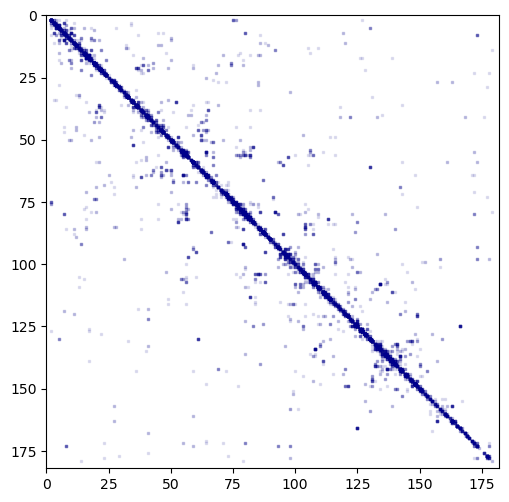

In [41]:
def plotHiCscatter(df, bin1, bin2, params):
     
    plt.rcParams['figure.dpi'] = params['figdpi']
    plt.rcParams['figure.figsize'] = params['figsize']
    
    plt.scatter(df[bin1], df[bin2], 
                marker='s', 
                s=params['size'], 
                alpha=params['alpha'], 
                c=params['color'])


    plt.scatter(df[bin2], 
                df[bin1], 
                marker='s', 
                s=params['size'], 
                alpha=params['alpha'], 
                c=params['color'])

    plt.xlim(0, len(bins))
    plt.ylim(len(bins), 0)
    ax = plt.gca() # Get current axes object
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    plt.gca().set_aspect('equal', adjustable='box')

    
params = {
    'figdpi' : 100,
    'figsize' : (6,6),
    'size' : 1,
    'alpha' : 0.1,
#     'color' : np.log(chr2['edgeOrder']),
    'color' : 'darkblue',
}

# plt.set_cmap('gnuplot_r')
plotHiCscatter(chr2, bin1='align1_chrom2Bin', bin2='align2_chrom2Bin', params=params)


# clb = plt.colorbar(fraction=0.046, pad=0.04, ticks=[np.min(np.log(chr2['edgeOrder'])), np.max(np.log(chr2['edgeOrder']))])
# clb.ax.set_yticklabels(['low', 'high'])
# clb.ax.set_title('Contact Order',fontsize=8)

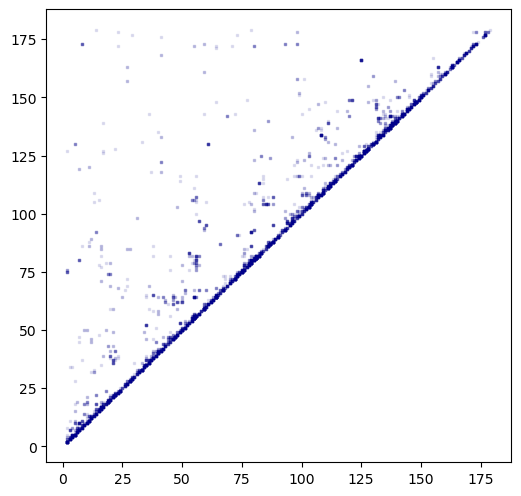

In [47]:
alpha = 0.1
size = 1


plt.scatter(chr2['align1_chrom2Bin'], 
            chr2['align2_chrom2Bin'], 
            marker='s', 
            s=size, 
            alpha=alpha, 
            c='darkblue')